# Lesson 6 Assignment - Advertising Sales Regression

## Author - Studentname



### Problem:  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product, and the independent features for each regression are:

 1. 'TV': spend on TV ads.
 2. 'radio': spend on radio ads.
 3. 'newspaper': spend on newspaper ads.
 4. linear regression with 3 features: (a) TV, (b) radio, and (c) newspaper. 

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4):
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.




#### Hints

What are the independent variables?

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the target/response variable?

- Sales: sales of a single product in a given market (in some units of $$ or counts)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Examine correlatoin between variables
Examine if there is a linear relationship between sales (dependent variable) and tv, radio and and newspaper ads.

[Text(0,0.5,'Sales'), Text(0.5,0,'Newspaper')]

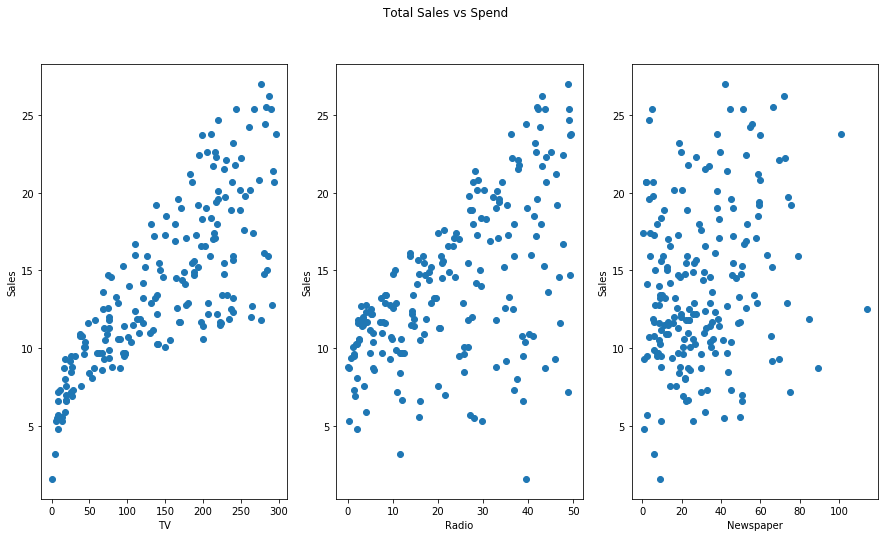

In [3]:
plt.rcParams['figure.figsize'] = 15, 8
f, axarr = plt.subplots(1, 3)
f.suptitle('Total Sales vs Spend')
axarr[0].scatter(ad_data['TV'], ad_data['sales'])
axarr[0].set(xlabel='TV', ylabel='Sales')
axarr[1].scatter(ad_data['radio'], ad_data['sales'])
axarr[1].set(xlabel='Radio', ylabel='Sales')
axarr[2].scatter(ad_data['newspaper'], ad_data['sales'])
axarr[2].set(xlabel='Newspaper', ylabel='Sales')

## Linear Regression
Let's start with the first independent variable, TV and build a model to examine it's effect on sales. 

Slope: [[0.04753664]]
Intercept: [7.03259355]
Root mean squared error:  10.512652915656757
R2 score:  0.611875050850071


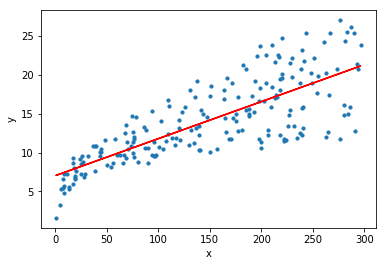

In [16]:
# standard template used for sales in TV

# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sckit-learn implementation
x = ad_data[["TV"]] # note that this expects a pandas dataframe as shape, so subset with [[]]
y = ad_data[["sales"]]

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

## The same model in statsmodels
Wait, why is this different? 

In [17]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          3.52e-100
Time:                        14:22:24   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stasmodels does not automatically incorporate the Beta0, your y intercept, so you must manually specify it in your model. If not supplied, y is set to 1. 

In [19]:
import statsmodels.api as sm

X = sm.add_constant(x)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        14:23:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting the Coefficients
**R squared** tells us what percent of variance is explained by our model. We can interpert this as only about 60% of of the variance in sales can be accounted for by TV ads which is not very much. 

**P value** Although not all the variance we see in sales can be accounted for by TV ads, our p-value is at 0.00, indicating that TV ads do have a significant impact on sales. 

**Coefficients** As TV ads increase by 1, sales increase by 0.0475. 

**Standard Error** Standard deviation of the mean in our test. 

**Confidence Interval** We're 95% confident that the true value lies between 0.042 and 0.053. 

## Multiple Linear Regression
Now let's run through that with all three independent variables and see if it improves our model. 

In [26]:
# first lets redefine our x and y
x = ad_data[["TV", "radio", "newspaper"]] # note that this expects a pandas dataframe as shape, so subset with [[]]
y = ad_data[["sales"]]

In [27]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[ 0.04576465  0.18853002 -0.00103749]]
Intercept: [2.93888937]
Root mean squared error:  2.784126314510936
R2 score:  0.8972106381789522


In [28]:
import statsmodels.api as sm

X = sm.add_constant(x)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        15:26:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""